# Model 2: Random Forest

In [174]:
# Importing relevant libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from pprint import pprint
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [175]:
np.random.seed(0)

In [176]:
# Reading in the datasets, which we have already split into training, testing, and validation 
df_full = pd.read_csv('Habitable_Full_Balanced.csv')
df_train = pd.read_csv('Habitable_Train_Balanced.csv')
df_test = pd.read_csv('Habitable_Test.csv')
df_val = pd.read_csv('Habitable_Val.csv')

In [177]:
print(df_full['Habitable'].value_counts())
print(df_train['Habitable'].value_counts())
print(df_test['Habitable'].value_counts())
print(df_val['Habitable'].value_counts())

0    5145
1    1544
Name: Habitable, dtype: int64
0    3608
1    1082
Name: Habitable, dtype: int64
0    770
1     12
Name: Habitable, dtype: int64
0    767
1     14
Name: Habitable, dtype: int64


In [178]:
# Create a random forest classifier
model = RandomForestClassifier()

In [179]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## 1.0 All features
**Evaluating the default model**

In [183]:
# Define features (X) and target (y)
X_train = df_train.drop(columns=['Habitable'])
y_train = df_train['Habitable']

X_test = df_test.drop(columns=['Habitable'])
y_test = df_test['Habitable']

X_val = df_val.drop(columns=['Habitable'])
y_val = df_val['Habitable']

# Print the sizes of the resulting datasets
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (4690, 6)
Validation set size: (781, 6)
Testing set size: (782, 6)


In [184]:
# Fit the model to the training data
rf_all = model.fit(X_train, y_train)

In [185]:
# Print classification report for training set
y_train_pred = rf_all.predict(X_train)
print("Training set classification report:")
print(classification_report(y_train, y_train_pred))

Training set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3608
           1       1.00      1.00      1.00      1082

    accuracy                           1.00      4690
   macro avg       1.00      1.00      1.00      4690
weighted avg       1.00      1.00      1.00      4690



In [186]:
# Print classification report for validation set
y_val_pred = rf_all.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))

Validation set classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.64      0.50      0.56        14

    accuracy                           0.99       781
   macro avg       0.81      0.75      0.78       781
weighted avg       0.98      0.99      0.99       781



In [187]:
# K-fold cross-validation
X_full = df_full.drop(columns=['Habitable'])
y_full = df_full['Habitable']

# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full), 1):
    X_train = X_full.iloc[train_index]
    y_train = y_full[train_index]
    X_test = X_full.iloc[test_index]
    y_test = y_full[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')


For fold 1, we look on the macro avg:
Accuracy: 0.992526158445441
Precision: 0.9873886594347134
Recall: 0.9917566210618802
F1 Score: 0.9895505323136902

Confusion Matrix:
[[1021    7]
 [   3  307]]

For fold 2, we look on the macro avg:
Accuracy: 0.9887892376681614
Precision: 0.9783875622585301
Recall: 0.9904242593912247
F1 Score: 0.9842375968264714

Confusion Matrix:
[[1021   13]
 [   2  302]]

For fold 3, we look on the macro avg:
Accuracy: 0.9955156950672646
Precision: 0.9936735594502585
Recall: 0.9936735594502585
F1 Score: 0.9936735594502585

Confusion Matrix:
[[1027    3]
 [   3  305]]

For fold 4, we look on the macro avg:
Accuracy: 0.9940209267563528
Precision: 0.9882232960963977
Recall: 0.9949703501985137
F1 Score: 0.9915454778100387

Confusion Matrix:
[[1027    7]
 [   1  303]]

For fold 5, we look on the macro avg:
Accuracy: 0.9887808526551982
Precision: 0.9783549458535794
Recall: 0.9915581930737374
F1 Score: 0.9847400559264966

Confusion Matrix:
[[1005   14]
 [   1  317]]

M

Cross validation take in a dataset where it has been applied SMOTE and is therefore more balanced. That leads to better results than the classification report for validation set.

**Investigate feature importance for the model**

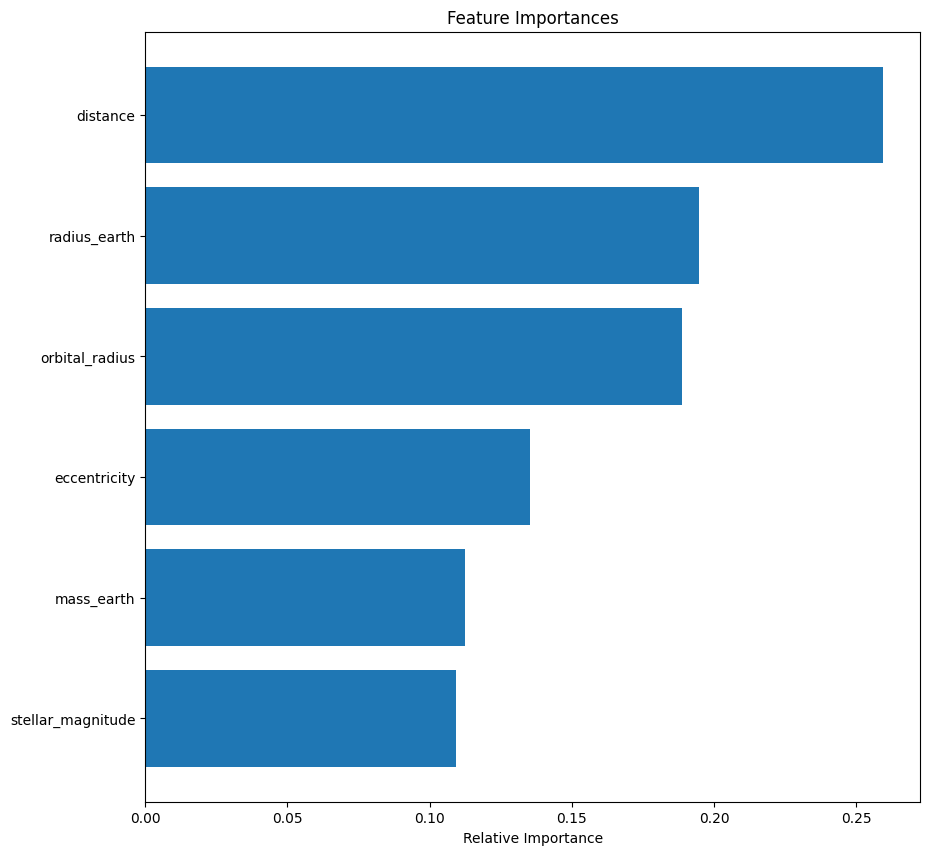

In [188]:
# feature importance for the model
importances = rf_all.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [189]:
# Feature importance scores
feature_importances = rf_all.feature_importances_
feature_importances_df = pd.DataFrame({'feature': X_full.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
print(feature_importances_df)

             feature  importance
0           distance    0.259445
5       radius_earth    0.194661
2     orbital_radius    0.188641
3       eccentricity    0.135399
4         mass_earth    0.112505
1  stellar_magnitude    0.109350


# 2.0 Selected features

## 5 features

In [190]:
# Define features (X) and target (y)
X_train_5 = df_train[['distance', 'radius_earth', 'orbital_radius', 'eccentricity', 'mass_earth']]
y_train_5 = df_train['Habitable']

X_test_5 = df_test[['distance', 'radius_earth', 'orbital_radius', 'eccentricity', 'mass_earth']]
y_test_5 = df_test['Habitable']

X_val_5 = df_val[['distance', 'radius_earth', 'orbital_radius', 'eccentricity', 'mass_earth']]
y_val_5 = df_val['Habitable']

In [191]:
# Fit the model with fewer features
rf_5 = model.fit(X_train_5, y_train_5)

In [192]:
# Classification report for train set
y_train_pred_5 = rf_5.predict(X_train_5)
print(classification_report(y_train_5, y_train_pred_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3608
           1       1.00      1.00      1.00      1082

    accuracy                           1.00      4690
   macro avg       1.00      1.00      1.00      4690
weighted avg       1.00      1.00      1.00      4690



In [193]:
# Classification report for validation set
y_val_pred_5 = rf_5.predict(X_val_5)
print(classification_report(y_val_5, y_val_pred_5))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.37      0.50      0.42        14

    accuracy                           0.98       781
   macro avg       0.68      0.74      0.71       781
weighted avg       0.98      0.98      0.98       781



In [195]:
# K-fold cross-validation
X_full_5 = df_full[['distance', 'radius_earth', 'orbital_radius', 'eccentricity', 'mass_earth']]
y_full_5 = df_full['Habitable']

# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    rf_5.fit(X_train, y_train)

    y_pred = rf_5.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9880418535127056
Precision: 0.9811467456210191
Recall: 0.9854587674155892
F1 Score: 0.9832808517019043

Confusion Matrix:
[[1018   10]
 [   6  304]]

For fold 2, we look on the macro avg:
Accuracy: 0.9813153961136024
Precision: 0.9680072615556486
Recall: 0.9797827802097119
F1 Score: 0.973729328044119

Confusion Matrix:
[[1016   18]
 [   7  297]]

For fold 3, we look on the macro avg:
Accuracy: 0.9850523168908819
Precision: 0.9712360289283366
Recall: 0.9880153826755769
F1 Score: 0.9792848472838069

Confusion Matrix:
[[1012   18]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9857997010463379
Precision: 0.9723728777060305
Recall: 0.9884900234144356
F1 Score: 0.980123829278533

Confusion Matrix:
[[1017   17]
 [   2  302]]

For fold 5, we look on the macro avg:
Accuracy: 0.9835452505609573
Precision: 0.9692390942390943
Recall: 0.987041803223039
F1 Score: 0.9777348835801012

Confusion Matrix:
[[999  20]
 [  2 316]]

Mean Ma

## 4 features

In [196]:
# Define features (X) and target (y)
X_train_4 = df_train[['distance', 'radius_earth', 'orbital_radius', 'eccentricity']]
y_train_4 = df_train['Habitable']

X_test_4 = df_test[['distance', 'radius_earth', 'orbital_radius', 'eccentricity']]
y_test_4 = df_test['Habitable']

X_val_4 = df_val[['distance', 'radius_earth', 'orbital_radius', 'eccentricity']]
y_val_4 = df_val['Habitable']

In [197]:
# Fit the model with fewer features
rf_4 = model.fit(X_train_4, y_train_4)

In [198]:
# Classification report for train set
y_train_pred_4 = rf_4.predict(X_train_4)
print(classification_report(y_train_4, y_train_pred_4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3608
           1       1.00      1.00      1.00      1082

    accuracy                           1.00      4690
   macro avg       1.00      1.00      1.00      4690
weighted avg       1.00      1.00      1.00      4690



In [199]:
# Classification report for validation set
y_val_pred_4 = rf_4.predict(X_val_4)
print(classification_report(y_val_4, y_val_pred_4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.35      0.43      0.39        14

    accuracy                           0.98       781
   macro avg       0.67      0.71      0.69       781
weighted avg       0.98      0.98      0.98       781



In [200]:
# K-fold cross-validation
X_full_4 = df_full[['distance', 'radius_earth', 'orbital_radius', 'eccentricity']]
y_full_4 = df_full['Habitable']

# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_4), 1):
    X_train = X_full_4.iloc[train_index]
    y_train = y_full_4.iloc[train_index]
    X_test = X_full_4.iloc[test_index]
    y_test = y_full_4.iloc[test_index]

    rf_4.fit(X_train, y_train)

    y_pred = rf_4.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9813153961136024
Precision: 0.9722699290890673
Recall: 0.9754487259947282
F1 Score: 0.9738471437875433

Confusion Matrix:
[[1014   14]
 [  11  299]]

For fold 2, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9695119675557324
Recall: 0.9802663392039093
F1 Score: 0.9747516204817572

Confusion Matrix:
[[1017   17]
 [   7  297]]

For fold 3, we look on the macro avg:
Accuracy: 0.9850523168908819
Precision: 0.9712360289283366
Recall: 0.9880153826755769
F1 Score: 0.9792848472838069

Confusion Matrix:
[[1012   18]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9865470852017937
Precision: 0.9747981124129901
Recall: 0.9878124045607248
F1 Score: 0.9811064390611272

Confusion Matrix:
[[1019   15]
 [   3  301]]

For fold 5, we look on the macro avg:
Accuracy: 0.9827973074046372
Precision: 0.9686522477433194
Recall: 0.9854694761790138
F1 Score: 0.9766987216159877

Confusion Matrix:
[[999  20]
 [  3 315]]

Mean

## 3 features

In [201]:
# Define features (X) and target (y)
X_train_3 = df_train[['distance', 'radius_earth', 'orbital_radius']]
y_train_3 = df_train['Habitable']

X_test_3 = df_test[['distance', 'radius_earth', 'orbital_radius']]
y_test_3 = df_test['Habitable']

X_val_3 = df_val[['distance', 'radius_earth', 'orbital_radius']]
y_val_3 = df_val['Habitable']

In [202]:
# Fit the model with fewer features
rf_3 = model.fit(X_train_3, y_train_3)

In [203]:
# Classification report for train set
y_train_pred_3 = rf_3.predict(X_train_3)
print(classification_report(y_train_3, y_train_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3608
           1       1.00      1.00      1.00      1082

    accuracy                           1.00      4690
   macro avg       1.00      1.00      1.00      4690
weighted avg       1.00      1.00      1.00      4690



In [204]:
# Classification report for validation set
y_val_pred_3 = rf_3.predict(X_val_3)
print(classification_report(y_val_3, y_val_pred_3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.47      0.64      0.55        14

    accuracy                           0.98       781
   macro avg       0.73      0.81      0.77       781
weighted avg       0.98      0.98      0.98       781



In [205]:
# K-fold cross-validation
X_full_3 = df_full[['distance', 'radius_earth', 'orbital_radius']]
y_full_3 = df_full['Habitable']

# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_3), 1):
    X_train = X_full_3.iloc[train_index]
    y_train = y_full_3.iloc[train_index]
    X_test = X_full_3.iloc[test_index]
    y_test = y_full_3.iloc[test_index]

    rf_3.fit(X_train, y_train)

    y_pred = rf_3.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9813153961136024
Precision: 0.9685211222304928
Recall: 0.9799548136061252
F1 Score: 0.9740777048888132

Confusion Matrix:
[[1010   18]
 [   7  303]]

For fold 2, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9676748057713651
Recall: 0.9825886948997251
F1 Score: 0.9748651364915764

Confusion Matrix:
[[1015   19]
 [   5  299]]

For fold 3, we look on the macro avg:
Accuracy: 0.9835575485799701
Precision: 0.9691997224048505
Recall: 0.9859065691589963
F1 Score: 0.9772133320121876

Confusion Matrix:
[[1011   19]
 [   3  305]]

For fold 4, we look on the macro avg:
Accuracy: 0.9813153961136024
Precision: 0.9653231512879185
Recall: 0.9832663137534359
F1 Score: 0.9739054119941492

Confusion Matrix:
[[1013   21]
 [   4  300]]

For fold 5, we look on the macro avg:
Accuracy: 0.9850411368735976
Precision: 0.9737714784388072
Recall: 0.9858598576727708
F1 Score: 0.9796320670785955

Confusion Matrix:
[[1003   16]
 [   4  314]]



When assessing accuracy, precision, recall, and F1 score, the model with 5 features achieves comparable results to the full dataset using fewer features compared to when all features are utilized. It scores better for the macro average, but a little worse at the cross validation. Based on the results, to reduce model complexity, we will use the 5 feature set for further tuning.

## 3.0 Parameter Tuning 

Tuning class_weight, n_estimators, max_features, max_depth, max_leaf_nodes, max_samples and min_samples_split for the selected features. 

In [206]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

### 3.1 Class weight
class_weight

In [207]:
# Define the parameter grid for class weights
param_grid = {
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}, {0: 1, 1: 10}],
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 10}}


In [208]:
# Iterate over each class weight setting from the param_grid
for i in param_grid['class_weight']:  
    print(f"Evaluating model with class weight: {i}")
    model = RandomForestClassifier(class_weight=i)
    model.fit(X_train_5, y_train_5)  # Training the model with the specified class weight
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with class weight: None
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.39      0.50      0.44        14

    accuracy                           0.98       781
   macro avg       0.69      0.74      0.71       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with class weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.41      0.50      0.45        14

    accuracy                           0.98       781
   macro avg       0.70      0.74      0.72       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with class weight: {0: 1, 1: 2}
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.44      0.50      0.47        14

    accuracy                           0.98    

In [209]:
# Based on the manually output {0: 1, 1: 2} performes best at macro avg for f1-score
class_weight_best = {0: 1, 1: 2}

Cross validation with class weight

In [210]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9887892376681614
Precision: 0.9806909784123315
Recall: 0.988198192544245
F1 Score: 0.9843779554036162

Confusion Matrix:
[[1017   11]
 [   4  306]]

For fold 2, we look on the macro avg:
Accuracy: 0.9835575485799701
Precision: 0.9688390225933203
Recall: 0.9858781685839357
F1 Score: 0.9770111710901185

Confusion Matrix:
[[1015   19]
 [   3  301]]

For fold 3, we look on the macro avg:
Accuracy: 0.9850523168908819
Precision: 0.9712360289283366
Recall: 0.9880153826755769
F1 Score: 0.9792848472838069

Confusion Matrix:
[[1012   18]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9865470852017937
Precision: 0.9747981124129901
Recall: 0.9878124045607248
F1 Score: 0.9811064390611272

Confusion Matrix:
[[1019   15]
 [   3  301]]

For fold 5, we look on the macro avg:
Accuracy: 0.9857890800299177
Precision: 0.9734784585382195
Recall: 0.9885138346263755
F1 Score: 0.9807110700067503

Confusion Matrix:
[[1002   17]
 [   2  316]]

M

### 3.2 Number of trees in the forest
n_estimators

In [211]:
# Define the parameter grid for n_estimators. Using the best value from class_weight
param_grid = {
    'class_weight': [class_weight_best],
    'n_estimators' : [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'n_estimators': 300}


In [212]:
# Iterate over each n_estimators setting from the param_grid
for i in param_grid['n_estimators']:  
    print(f"Evaluating model with n_estimarot: {i}")
    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=i)
    model.fit(X_train_5, y_train_5)  # Train the model with the parameters
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with n_estimarot: 50
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.43      0.43      0.43        14

    accuracy                           0.98       781
   macro avg       0.71      0.71      0.71       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with n_estimarot: 100
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.44      0.50      0.47        14

    accuracy                           0.98       781
   macro avg       0.71      0.74      0.73       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with n_estimarot: 150
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.44      0.50      0.47        14

    accuracy                           0.98       781
   macro avg

In [213]:
# Based on the manually output 100 gives the best macro avg for f1-score with the lowest complexity
n_estimators_best = 100 

In [214]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9895366218236173
Precision: 0.9822202680274468
Recall: 0.9886845738672022
F1 Score: 0.9854032572274605

Confusion Matrix:
[[1018   10]
 [   4  306]]

For fold 2, we look on the macro avg:
Accuracy: 0.9790732436472347
Precision: 0.9653506916799364
Recall: 0.9760097475313041
F1 Score: 0.9705435572287167

Confusion Matrix:
[[1015   19]
 [   9  295]]

For fold 3, we look on the macro avg:
Accuracy: 0.984304932735426
Precision: 0.9697820639380363
Recall: 0.987529945782373
F1 Score: 0.9782728215406671

Confusion Matrix:
[[1011   19]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9872944693572496
Precision: 0.9753612620768282
Recall: 0.9894571414028301
F1 Score: 0.9821761463145151

Confusion Matrix:
[[1019   15]
 [   2  302]]

For fold 5, we look on the macro avg:
Accuracy: 0.9865370231862378
Precision: 0.9749085895822094
Recall: 0.989004511760821
F1 Score: 0.9817072058376406

Confusion Matrix:
[[1003   16]
 [   2  316]]

Mea

### 3.3 
max_features 

In [215]:
# Define the parameter grid. 
param_grid = {
    'class_weight': [class_weight_best],
    'n_estimators' : [n_estimators_best], 
    'max_features': [None, 'sqrt', 'log2', 0.25, 0.5, 0.75, 10, 20, 30]
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_features': 'sqrt', 'n_estimators': 100}


In [216]:
# Iterate over each setting from the param_grid
for i in param_grid['max_features']:  
    print(f"Evaluating model with max features: {i}")
    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_features = i)
    model.fit(X_train_5, y_train_5)  # Train the model with the parameters
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with max features: None
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.35      0.43      0.39        14

    accuracy                           0.98       781
   macro avg       0.67      0.71      0.69       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with max features: sqrt
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.39      0.50      0.44        14

    accuracy                           0.98       781
   macro avg       0.69      0.74      0.71       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with max features: log2
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.43      0.43      0.43        14

    accuracy                           0.98       781
   ma

In [217]:
# Based on the manually output 0.5 gives the best macro avg for f1-score
max_features_best = 0.5

In [218]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best,max_features=max_features_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9872944693572496
Precision: 0.9796071312200345
Recall: 0.984972386092632
F1 Score: 0.9822556801560214

Confusion Matrix:
[[1017   11]
 [   6  304]]

For fold 2, we look on the macro avg:
Accuracy: 0.9798206278026906
Precision: 0.9659312014150724
Recall: 0.9776544843734094
F1 Score: 0.9716276742876486

Confusion Matrix:
[[1015   19]
 [   8  296]]

For fold 3, we look on the macro avg:
Accuracy: 0.984304932735426
Precision: 0.9706583903979015
Recall: 0.9863920060522002
F1 Score: 0.9782252721066029

Confusion Matrix:
[[1012   18]
 [   3  305]]

For fold 4, we look on the macro avg:
Accuracy: 0.9872944693572496
Precision: 0.9763115021179538
Recall: 0.9882959635549222
F1 Score: 0.982135943070001

Confusion Matrix:
[[1020   14]
 [   3  301]]

For fold 5, we look on the macro avg:
Accuracy: 0.9827973074046372
Precision: 0.9686522477433194
Recall: 0.9854694761790138
F1 Score: 0.9766987216159877

Confusion Matrix:
[[999  20]
 [  3 315]]

Mean Ma

### 3.4 The maximum depth of each tree
max_depth

In [225]:
# Define the parameter grid. 
param_grid = {
    'class_weight': [class_weight_best],
    'n_estimators' : [n_estimators_best], 
    'max_features': [max_features_best],
    'max_depth': [2, 5, 8, 10, 30]
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 30, 'max_features': 0.5, 'n_estimators': 100}


In [226]:
# Iterate over each setting from the param_grid
for i in param_grid['max_depth']:  
    print(f"Evaluating model with max_depth: {i}")
    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_depth=i)
    model.fit(X_train_5, y_train_5)  # Train the model with the parameters
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with max_depth: 2
              precision    recall  f1-score   support

           0       0.99      0.83      0.91       767
           1       0.07      0.71      0.13        14

    accuracy                           0.83       781
   macro avg       0.53      0.77      0.52       781
weighted avg       0.98      0.83      0.89       781

Evaluating model with max_depth: 5
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       767
           1       0.12      0.43      0.18        14

    accuracy                           0.93       781
   macro avg       0.55      0.68      0.57       781
weighted avg       0.97      0.93      0.95       781

Evaluating model with max_depth: 8
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       767
           1       0.26      0.57      0.36        14

    accuracy                           0.96       781
   macro avg       0.63

In [227]:
# Based on the manually output 30 gives the best macro avg for f1-score with the lowest complexity
max_depth_best = 30

In [228]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best,max_features=max_features_best,max_depth=max_depth_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9880418535127056
Precision: 0.9791712911579726
Recall: 0.9877118112212878
F1 Score: 0.9833548964968153

Confusion Matrix:
[[1016   12]
 [   4  306]]

For fold 2, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9695119675557324
Recall: 0.9802663392039093
F1 Score: 0.9747516204817572

Confusion Matrix:
[[1017   17]
 [   7  297]]

For fold 3, we look on the macro avg:
Accuracy: 0.9835575485799701
Precision: 0.9683370110817431
Recall: 0.9870445088891691
F1 Score: 0.9772629666591484

Confusion Matrix:
[[1010   20]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9880418535127056
Precision: 0.9778345193073248
Recall: 0.9887795225491194
F1 Score: 0.9831677469878382

Confusion Matrix:
[[1021   13]
 [   3  301]]

For fold 5, we look on the macro avg:
Accuracy: 0.9850411368735976
Precision: 0.9712266899766899
Recall: 0.9891048074015096
F1 Score: 0.9797589850728192

Confusion Matrix:
[[1000   19]
 [   1  317]]



### 3.5 
max_leaf_nodes

In [230]:
# Define the parameter grid 
param_grid = {
    'class_weight': [class_weight_best],
    'n_estimators' : [n_estimators_best], 
    'max_features': [max_features_best],
    'max_depth': [max_depth_best],
    'max_leaf_nodes': [None, 20, 40, 60, 80, 100]
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 30, 'max_features': 0.5, 'max_leaf_nodes': 100, 'n_estimators': 100}


In [231]:
# Iterate over each setting from the param_grid
for i in param_grid['max_leaf_nodes']:  
    print(f"Evaluating model with max_leaf_nodes: {i}")
    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_depth=max_depth_best, max_leaf_nodes=i)
    model.fit(X_train_5, y_train_5)  # Train the model with the parameters
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with max_leaf_nodes: None
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       767
           1       0.38      0.43      0.40        14

    accuracy                           0.98       781
   macro avg       0.68      0.71      0.69       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with max_leaf_nodes: 20
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       767
           1       0.21      0.50      0.30        14

    accuracy                           0.96       781
   macro avg       0.60      0.73      0.64       781
weighted avg       0.98      0.96      0.97       781

Evaluating model with max_leaf_nodes: 40
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       767
           1       0.26      0.57      0.36        14

    accuracy                           0.96       781
   

In [232]:
# Based on the manually output 80 gives the best macro avg for f1-score
max_leaf_nodes_best = 80

In [233]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_features=max_features_best, max_depth=max_depth_best, 
                                   max_leaf_nodes=max_leaf_nodes_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9857997010463379
Precision: 0.9746689456804418
Recall: 0.9862526672524162
F1 Score: 0.980299055715498

Confusion Matrix:
[[1013   15]
 [   4  306]]

For fold 2, we look on the macro avg:
Accuracy: 0.9798206278026906
Precision: 0.9615961728301313
Recall: 0.9834603736129492
F1 Score: 0.9719423437921095

Confusion Matrix:
[[1010   24]
 [   3  301]]

For fold 3, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9654733156242454
Recall: 0.9860736351027614
F1 Score: 0.9752497225305217

Confusion Matrix:
[[1008   22]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9790732436472347
Precision: 0.9593757546486357
Recall: 0.9841379924666599
F1 Score: 0.9709987861973296

Confusion Matrix:
[[1008   26]
 [   2  302]]

For fold 5, we look on the macro avg:
Accuracy: 0.9745699326851159
Precision: 0.9536886895352974
Recall: 0.9800720277001129
F1 Score: 0.9659398789186597

Confusion Matrix:
[[988  31]
 [  3 315]]

Mean 

### 3.6 
max_samples

In [234]:
# Define the parameter grid.
param_grid = {
    'class_weight': [class_weight_best],
    'n_estimators' : [n_estimators_best], 
    'max_features': [max_features_best],
    'max_depth': [max_depth_best],
    'max_leaf_nodes': [max_leaf_nodes_best],
    'max_samples': [0.85, 0.9, 0.95, 1.0]
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 30, 'max_features': 0.5, 'max_leaf_nodes': 80, 'max_samples': 0.85, 'n_estimators': 100}


In [235]:
# Iterate over each setting from the param_grid
for i in param_grid['max_samples']:  
    print(f"Evaluating model with max_samples: {i}")
    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_depth=max_depth_best, max_leaf_nodes= max_leaf_nodes_best,max_samples =i)
    model.fit(X_train_5, y_train_5)  # Train the model with the parameters
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with max_samples: 0.85
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.36      0.57      0.44        14

    accuracy                           0.97       781
   macro avg       0.68      0.78      0.72       781
weighted avg       0.98      0.97      0.98       781

Evaluating model with max_samples: 0.9
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.35      0.50      0.41        14

    accuracy                           0.97       781
   macro avg       0.67      0.74      0.70       781
weighted avg       0.98      0.97      0.98       781

Evaluating model with max_samples: 0.95
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.37      0.50      0.42        14

    accuracy                           0.98       781
   macro 

In [236]:
# The automatically output gives the best macro avg for f1-score with the lowest complexity
max_samples_best = best_params['max_samples']

In [237]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_features=max_features_best, max_depth=max_depth_best, 
                                   max_leaf_nodes=max_leaf_nodes_best, max_samples=max_samples_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9850523168908819
Precision: 0.9750462449130596
Recall: 0.9835132421237605
F1 Score: 0.9791936206210191

Confusion Matrix:
[[1014   14]
 [   6  304]]

For fold 2, we look on the macro avg:
Accuracy: 0.9775784753363229
Precision: 0.9589542698517057
Recall: 0.9796873409345414
F1 Score: 0.9687904309315287

Confusion Matrix:
[[1009   25]
 [   5  299]]

For fold 3, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9654733156242454
Recall: 0.9860736351027614
F1 Score: 0.9752497225305217

Confusion Matrix:
[[1008   22]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9790732436472347
Precision: 0.9593757546486357
Recall: 0.9841379924666599
F1 Score: 0.9709987861973296

Confusion Matrix:
[[1008   26]
 [   2  302]]

For fold 5, we look on the macro avg:
Accuracy: 0.9775617053103964
Precision: 0.9575879446813227
Recall: 0.9841980360570544
F1 Score: 0.9699469519870527

Confusion Matrix:
[[990  29]
 [  1 317]]

Mean

### 3.7
min_samples_split

In [238]:
# Define the parameter grid 
param_grid = {
    'class_weight': [class_weight_best],
    'n_estimators' : [n_estimators_best], 
    'max_features': [max_features_best],
    'max_depth': [max_depth_best],
    'max_leaf_nodes': [max_leaf_nodes_best],
    'max_samples': [max_samples_best],
    'min_samples_split': [2, 5, 10, 15, 20, 50]
}

# Initialize GridSearchCV with the RandomForest model and parameter grid
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV to find the best parameters
grid_search.fit(X_train_5, y_train_5)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 2}, 'max_depth': 30, 'max_features': 0.5, 'max_leaf_nodes': 80, 'max_samples': 0.85, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Iterate over each setting from the param_grid
for i in param_grid['min_samples_split']:  
    print(f"Evaluating model with min_samples_split: {i}")
    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_depth=max_depth_best, max_leaf_nodes= max_leaf_nodes_best,max_samples=max_samples_best, min_samples_split= i)
    model.fit(X_train_5, y_train_5)  # Train the model with the parameters
    predictions = model.predict(X_val_5)  
    print(classification_report(y_val_5, predictions))  

Evaluating model with min_samples_split: 2
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.37      0.50      0.42        14

    accuracy                           0.98       781
   macro avg       0.68      0.74      0.71       781
weighted avg       0.98      0.98      0.98       781

Evaluating model with min_samples_split: 5
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.35      0.50      0.41        14

    accuracy                           0.97       781
   macro avg       0.67      0.74      0.70       781
weighted avg       0.98      0.97      0.98       781

Evaluating model with min_samples_split: 10
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.36      0.57      0.44        14

    accuracy                           0.97       78

In [240]:
# Based on the manually output 10 gives the best scores for f1 macro avg.
min_samples_split_best = 10

In [241]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model = RandomForestClassifier(class_weight=class_weight_best, n_estimators=n_estimators_best, max_features=max_features_best, max_depth=max_depth_best, 
                                   max_leaf_nodes=max_leaf_nodes_best, max_samples=max_samples_best, min_samples_split =min_samples_split_best)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9850523168908819
Precision: 0.9741067043222004
Recall: 0.9846397640266098
F1 Score: 0.9792393985942374

Confusion Matrix:
[[1013   15]
 [   5  305]]

For fold 2, we look on the macro avg:
Accuracy: 0.9775784753363229
Precision: 0.9589542698517057
Recall: 0.9796873409345414
F1 Score: 0.9687904309315287

Confusion Matrix:
[[1009   25]
 [   5  299]]

For fold 3, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9654733156242454
Recall: 0.9860736351027614
F1 Score: 0.9752497225305217

Confusion Matrix:
[[1008   22]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9813153961136024
Precision: 0.9636282177841902
Recall: 0.9855886694492517
F1 Score: 0.9740206886963978

Confusion Matrix:
[[1011   23]
 [   2  302]]

For fold 5, we look on the macro avg:
Accuracy: 0.9798055347793567
Precision: 0.9623390924401418
Recall: 0.9845884175508113
F1 Score: 0.9728146639204449

Confusion Matrix:
[[994  25]
 [  2 316]]

Mean

# 4.0 Model selection

## 4.1 Best Model based on individual performance

When individually tuning the individual parameters of the random forest, the following parameters produced the best performance:

In [242]:
print("class_weight_best: ", class_weight_best, "\n n_estimators_best: ", n_estimators_best,
      "\n max_features_best: ", max_features_best, "\n max_depth_best: ", max_depth_best,
      "\n max_leaf_nodes_best: ", max_leaf_nodes_best, "\n max_samples_best: ", max_samples_best,
      "\n min_samples_split_best: ", min_samples_split_best)

class_weight_best:  {0: 1, 1: 2} 
 n_estimators_best:  100 
 max_features_best:  0.5 
 max_depth_best:  30 
 max_leaf_nodes_best:  80 
 max_samples_best:  0.85 
 min_samples_split_best:  10


In [243]:
model_best_features = RandomForestClassifier(class_weight=class_weight_best, 
                                             n_estimators=n_estimators_best,
                                             max_features= max_features_best, 
                                             max_depth= max_depth_best,
                                             max_leaf_nodes= max_leaf_nodes_best,
                                             max_samples= max_samples_best,
                                             min_samples_split= min_samples_split_best
                                             )
                                            

# Fit the model
model_best_features.fit(X_train_5, y_train_5)

# Make predictions on the validation set
y_val_pred_best_features = model_best_features.predict(X_val_5)

# Print classification report for train set 
print("Training set classification report with best features:")
print(classification_report(y_train_5, model_best_features.predict(X_train_5))) 

# Print classification report for validation set 
print("Validation set classification report with best features:")
print(classification_report(y_val_5, y_val_pred_best_features)) 

Training set classification report with best features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3608
           1       0.98      1.00      0.99      1082

    accuracy                           1.00      4690
   macro avg       0.99      1.00      0.99      4690
weighted avg       1.00      1.00      1.00      4690

Validation set classification report with best features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       767
           1       0.30      0.50      0.38        14

    accuracy                           0.97       781
   macro avg       0.65      0.74      0.68       781
weighted avg       0.98      0.97      0.97       781



In [244]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model_best_features.fit(X_train, y_train)

    y_pred = model_best_features.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.984304932735426
Precision: 0.9735449654064929
Recall: 0.9830268608008033
F1 Score: 0.9781773785049741

Confusion Matrix:
[[1013   15]
 [   6  304]]

For fold 2, we look on the macro avg:
Accuracy: 0.9775784753363229
Precision: 0.9589542698517057
Recall: 0.9796873409345414
F1 Score: 0.9687904309315287

Confusion Matrix:
[[1009   25]
 [   5  299]]

For fold 3, we look on the macro avg:
Accuracy: 0.9820627802690582
Precision: 0.9654733156242454
Recall: 0.9860736351027614
F1 Score: 0.9752497225305217

Confusion Matrix:
[[1008   22]
 [   2  306]]

For fold 4, we look on the macro avg:
Accuracy: 0.9813153961136024
Precision: 0.9636282177841902
Recall: 0.9855886694492517
F1 Score: 0.9740206886963978

Confusion Matrix:
[[1011   23]
 [   2  302]]

For fold 5, we look on the macro avg:
Accuracy: 0.9790575916230366
Precision: 0.9609832789679391
Recall: 0.9840977404163658
F1 Score: 0.9718365381721885

Confusion Matrix:
[[993  26]
 [  2 316]]

Mean 

## 4.2 Best Model based on Grid Search

In [246]:
param_grid = {
    'class_weight': [None, {0: 1, 1: 2}, {0: 1, 1: 10}],
    'n_estimators': [50, 100, 300],
    'max_features': [0.25, 0.5, 0.75],
    'max_depth': [5, 10, 30],
    'max_leaf_nodes': [10, 40, 80],
    'max_samples': [0.75, 0.85, 0.95],
    'min_samples_split': [5, 10, 15]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_5, param_grid=param_grid, cv=5, scoring='f1_macro')

# Perform GridSearchCV
grid_search.fit(X_train_5, y_train_5)

# Get best parameters
best_params = grid_search.best_params_

# Print best parameters
print("Best Parameters:", best_params)

Best Parameters: {'class_weight': {0: 1, 1: 10}, 'max_depth': 30, 'max_features': 0.5, 'max_leaf_nodes': 80, 'max_samples': 0.85, 'min_samples_split': 5, 'n_estimators': 300}


In [247]:
# Store each parameter in a separate variable
class_weight_best_grid = best_params['class_weight']
n_estimators_best_grid = best_params['n_estimators']
max_features_best_grid = best_params['max_features']
max_depth_best_grid = best_params['max_depth']
max_leaf_nodes_best_grid = best_params['max_leaf_nodes']
max_samples_best_grid = best_params['max_samples']
min_samples_split_best_grid = best_params['min_samples_split']

In [248]:
model_best_grid_search_features = RandomForestClassifier(class_weight=class_weight_best_grid, 
                                            n_estimators=n_estimators_best_grid,
                                            max_features= max_features_best_grid, 
                                            max_depth= max_depth_best_grid,
                                            max_leaf_nodes= max_leaf_nodes_best_grid,
                                            max_samples= max_samples_best_grid,
                                            min_samples_split= min_samples_split_best_grid
                                            )                                        

# Fit the model on the training data
model_best_grid_search_features.fit(X_train_5, y_train_5)

# Make predictions on the validation set
y_val_pred_best_features = model_best_grid_search_features.predict(X_val_5)

# Print classification report for train set 
print("Training set classification report with best features:")
print(classification_report(y_train_5, model_best_grid_search_features.predict(X_train_5))) 

# Print classification report for validation set 
print("Validation set classification report with best features:")
print(classification_report(y_val_5, y_val_pred_best_features)) 

Training set classification report with best features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3608
           1       0.99      1.00      0.99      1082

    accuracy                           1.00      4690
   macro avg       0.99      1.00      1.00      4690
weighted avg       1.00      1.00      1.00      4690

Validation set classification report with best features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       767
           1       0.35      0.50      0.41        14

    accuracy                           0.97       781
   macro avg       0.67      0.74      0.70       781
weighted avg       0.98      0.97      0.98       781



In [249]:
# K-fold cross-validation
# Initialize KFold with shuffling and random_state for targeted reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store evaluation metrics for each fold
fold_accuracies = []
fold_precisions = []
fold_recalls = []
fold_f1_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_full_5), 1):
    X_train = X_full_5.iloc[train_index]
    y_train = y_full_5.iloc[train_index]
    X_test = X_full_5.iloc[test_index]
    y_test = y_full_5.iloc[test_index]

    model_best_grid_search_features.fit(X_train, y_train)

    y_pred = model_best_grid_search_features.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Append metrics to respective lists
    fold_accuracies.append(accuracy)
    fold_precisions.append(precision)
    fold_recalls.append(recall)
    fold_f1_scores.append(f1)

    print(f'For fold {fold}, we look on the macro avg:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print()

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{cm}\n')

# Mean evaluation metrics across all folds
mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
mean_precision = sum(fold_precisions) / len(fold_precisions)
mean_recall = sum(fold_recalls) / len(fold_recalls)
mean_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f'Mean Macro Accuracy across all folds: {mean_accuracy}')
print(f'Mean Macro Precision across all folds: {mean_precision}')
print(f'Mean Macro Recall across all folds: {mean_recall}')
print(f'Mean Macro F1 Score across all folds: {mean_f1}')

For fold 1, we look on the macro avg:
Accuracy: 0.9850523168908819
Precision: 0.9731867755660977
Recall: 0.985766285929459
F1 Score: 0.9792848472838069

Confusion Matrix:
[[1012   16]
 [   4  306]]

For fold 2, we look on the macro avg:
Accuracy: 0.9753363228699552
Precision: 0.955500037967955
Recall: 0.9770754861040416
F1 Score: 0.9657073090792451

Confusion Matrix:
[[1007   27]
 [   6  298]]

For fold 3, we look on the macro avg:
Accuracy: 0.9790732436472347
Precision: 0.9606331168831168
Recall: 0.9829939477997731
F1 Score: 0.9711869464500509

Confusion Matrix:
[[1005   25]
 [   3  305]]

For fold 4, we look on the macro avg:
Accuracy: 0.9775784753363229
Precision: 0.9558282833121752
Recall: 0.9843320523261733
F1 Score: 0.969062153163152

Confusion Matrix:
[[1005   29]
 [   1  303]]

For fold 5, we look on the macro avg:
Accuracy: 0.9798055347793567
Precision: 0.9615961072557796
Recall: 0.9856700674603909
F1 Score: 0.9728699910491037

Confusion Matrix:
[[993  26]
 [  1 317]]

Mean Ma

# 5.0 Model Evaluation

## 5.1 Evaluate on the test set

[[757  13]
 [  0  12]]


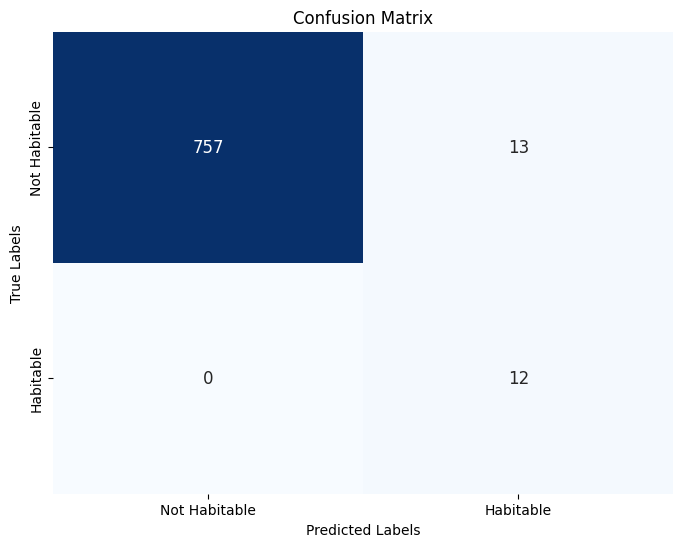

Test set classification report with best features:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       770
           1       0.48      1.00      0.65        12

    accuracy                           0.98       782
   macro avg       0.74      0.99      0.82       782
weighted avg       0.99      0.98      0.99       782

Confusion Matrix:
, [[757  13]
 [  0  12]]


In [251]:
y_pred = model_best_grid_search_features.predict(X_test_5)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_5, y_pred)
print(conf_matrix)

# Plot the confusion matrix with adjusted normalization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Not Habitable', 'Habitable'], yticklabels=['Not Habitable', 'Habitable'],
            annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for test set 
print("Test set classification report with best features:")
print(classification_report(y_test_5, model_best_grid_search_features.predict(X_test_5))) 
print(f'Confusion Matrix:\n,', confusion_matrix(y_test_5, y_pred))

### 5.1.1 Evaluate the test set on the model performed second best


[[759  11]
 [  0  12]]


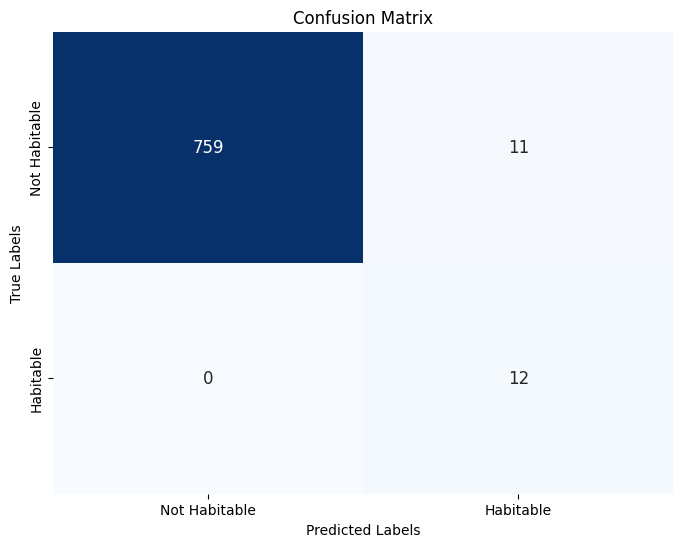

Test set classification report with best features:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       770
           1       0.52      1.00      0.69        12

    accuracy                           0.99       782
   macro avg       0.76      0.99      0.84       782
weighted avg       0.99      0.99      0.99       782



In [252]:
y_pred = model_best_features.predict(X_test_5)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_5, y_pred)
print(conf_matrix)

# Plot the confusion matrix with adjusted normalization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Not Habitable', 'Habitable'], yticklabels=['Not Habitable', 'Habitable'],
            annot_kws={"size": 12})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for test set 
print("Test set classification report with best features:")
print(classification_report(y_test_5, model_best_features.predict(X_test_5))) 

## 5.2 Time complexity

In [253]:
import time

training_times = {}

# Start measuring time for training
start_time = time.time()
model_best_grid_search_features.fit(X_train_5, y_train_5)  
end_time = time.time()

# Calculate training duration
training_duration = end_time - start_time

# Start measuring time for prediction
start_time = time.time()
predictions = model_best_grid_search_features.predict(X_test_5)
prediction_time = time.time() - start_time


training_times['Random Forest'] = {'Training Time': training_duration, 'Prediction Time': prediction_time}

print(classification_report(y_test_5, predictions))
print(f"Random Forest training time: {training_duration:.2f} seconds")
print(f"Random Forest prediction time: {prediction_time:.2f} seconds")


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       770
           1       0.25      0.25      0.25        12

    accuracy                           0.98       782
   macro avg       0.62      0.62      0.62       782
weighted avg       0.98      0.98      0.98       782

Random Forest training time: 0.93 seconds
Random Forest prediction time: 0.01 seconds
